# Project: Medical Treatment Cost Forecasting

## 1 Frame the Problem and Look at the Big Picture:

   ### 1.1 Define the objective of your project in your own words.
   
Define the objective in business terms.
   - How will your solution be used?
   - What are the current solutions/workarounds (if any)?
   - How should you frame this problem (supervised/unsupervised, online/offline, …)

Ziel des Projektes ist es, die Kosten einer medizischen Behandlung von neuen Patienten auf Basis von verschiedenen  bestehenden Daten, wie Alter, Geschlecht, BMI behandelter Patienten voherzusagen. Dazu nutzen wir die Lineare Regressionsmethode und SVR and ... .

- labeled training examples -> supervised learning task
- multiple features to predict a value -> multiple regression task
- to predict a single value: univariate regression
- ?? data small enough for memory and no continous flow -> batch learning (think so)

see HoML p.38f.

   ### 1.2 Select a performance criteria for evaluation of the task.
   
   - Is the performance measure aligned with the business objective?
   - What would be the minimum performance needed to reach the business objective?
   - What are comparable problems? Can you reuse experience or tools?
        - vielleicht Berechnungen von Versicherungspolicen   
   - Is human expertise available?
   
Zur Validierung des Modells wird ein im Vorfeld getrennter Testdatensatz verwendet, sodass die Ergebnisse der Simulation mit den Gebührenattribut der Testsamples verglichen werden kann.
Um eine Aussage über die Performance zu treffen wird im Folgenden Schritt der RMSE bestimmt (falls es zu viele ausreißer gibt mae). Unser Ziel ist es, die Kosten auf X%/€ genau abzuschätzen.
(Laut VL better evaluation using cross-validatation) End-to-end ML Project 2) - to estimate the generalization error

see HoML p.39-41

  ###  1.3 Explain in a paragraph how you would solve the problem manually.
  
  Ich würde mir die verschiedenen Attribute anschauen und nach Gemeinsamkeiten oder Tendenzen suchen. 
  MAn könnte beispielsweise die durchschnittliche Behandlungskosten aller Raucher und aller NIchtraucher gegenüberstellen um zu schauen welchen Faktor dieses Attribut mit sich zieht. Genauso ließe sich das Verfahren auf andere Attribute übertragen indem man verschiedene Cluster bildet, den Mittelwert davon ermittelt und diesen mit den anderen Clustern vergleicht um eine Gewichtung des Attributs zu berechnen.

 ###   1.4 List assumptions that you made so far.

 - List the assumptions you or others have made so far.
 - Verify assumptions if possible.

Ich vermute, dass mit steigenden alter und bmi die KOsten ansteigen. Ggf sind Männer auch häufiger bzw. stärker krank als Frauen (mit Studien belegen) oder Frauen werden im Durvchschnitt älter daher längere Behandlungszeit?
Auch ist wissenschaftlich bestätigt, dass Rauchen das Krebsrisiko erhöht und demnach Patienten, die Rauchen tendenziel teurere BEhandlungskosten haben sollten.
Unter Umständen gibt es auch geographische Unterschiede, wenn es beispielsweise eine Tendenz zum Wohlstand im Westen gibt, könnte hier die Anfälligkit für KRankheiten rückläufig sein da der Lebens--stand höher ist.
Kinder?


Studien die die Annahmen belegen:
    Steigende KOsten mit zunehmenden Alter: https://de.statista.com/statistik/daten/studie/172743/umfrage/ambulante-arztkosten-nach-geschlecht-und-alter-2009/
            gleiche STRudien zeigt auch, dass die KOsten für Frauen im Großteil ihres Lebens höher sind im Alter von 70 Jahren die Männer teurer sind
    Studien die die zusätzliches Kosten aufgrund von Adipositas (BMI) mit sich bringt: https://de.statista.com/statistik/daten/studie/593161/umfrage/kosten-fuer-uebergewicht-und-adipositas-in-deutschland-nach-leistungsbereich/
    Studie zur Sterblichkeit durch Rauchen (weitere Studien die zeigen, das es Eunterschide zwischen Männern und Frauen gibt)https://de.statista.com/statistik/daten/studie/1172024/umfrage/sterblichkeit-durch-rauchen-weltweit-nach-altersgruppen/
    Studie zu geographischen Unterschieden (Alzheimer) in den USA: https://de.statista.com/statistik/daten/studie/462273/umfrage/anzahl-von-alzheimerpatienten-in-den-usa-nach-bundesstaat/

#  2 Get the Data

## 2.1 Create a new workspace for the course project.

mit diesem Dokument erstellt

## 2.2 Discuss with your colleagues whether you would like to use a version management tool.

tbd

## 2.3 Get the Data

In [1]:
# import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/insurance.csv')     # creates a dataframe df with pandas from the file insurance.csc
insurance = df.copy() 

## 2.4 Convert the data to a format you can easily manipulate (if required).

In [3]:
insurance.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


convert sex, smoker and region:

In [4]:
#### One-hot encoding , week 5

# one-hot encoding of the sex column
x = pd.get_dummies(insurance['sex'], prefix='', prefix_sep='')
x

,female,male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
1333,0,1
1334,1,0
1335,1,0
1336,1,0


In [5]:
# one-hot encoding of the sex column
y = pd.get_dummies(insurance['smoker'], prefix='smoking ', prefix_sep='')
y

,smoking no,smoking yes
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
1333,1,0
1334,1,0
1335,1,0
1336,1,0


In [6]:
# one-hot encoding of the sex column
z = pd.get_dummies(insurance['region'], prefix='', prefix_sep='')
z

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
1333,0,1,0,0
1334,1,0,0,0
1335,0,0,1,0
1336,0,0,0,1


In [7]:
# concaternate new one hot encoded DataFrame into our main DataFrame
insurance = pd.concat([insurance, x,y,z], axis=1)
# display DataFrame
insurance

,age,sex,bmi,children,smoker,region,charges,female,male,smoking no,smoking yes,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0,1,0,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,0,1,1,0,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,1,0,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,1,0,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,1,0,0,1,0,0
1334,18,female,31.920,0,no,northeast,2205.98080,1,0,1,0,1,0,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,1,0,1,0,0,0,1,0
1336,21,female,25.800,0,no,southwest,2007.94500,1,0,1,0,0,0,0,1


In [8]:
# delete the sex, smoker and region column of our DataFrame after one-hot encoding
insurance = insurance.drop(columns=['sex','smoker','region'])
# display DataFrame
insurance

,age,bmi,children,charges,female,male,smoking no,smoking yes,northeast,northwest,southeast,southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


## 2.5 Check the size and type of the data.

In [9]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          1338 non-null   int64  
 1   bmi          1338 non-null   float64
 2   children     1338 non-null   int64  
 3   charges      1338 non-null   float64
 4   female       1338 non-null   uint8  
 5   male         1338 non-null   uint8  
 6   smoking no   1338 non-null   uint8  
 7   smoking yes  1338 non-null   uint8  
 8   northeast    1338 non-null   uint8  
 9   northwest    1338 non-null   uint8  
 10  southeast    1338 non-null   uint8  
 11  southwest    1338 non-null   uint8  
dtypes: float64(2), int64(2), uint8(8)
memory usage: 52.4 KB


In [10]:
insurance.describe()

,age,bmi,children,charges,female,male,smoking no,smoking yes,northeast,northwest,southeast,southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.494768,0.505232,0.795217,0.204783,0.242152,0.242900,0.272048,0.242900
std,14.049960,6.098187,1.205493,12110.011237,0.500160,0.500160,0.403694,0.403694,0.428546,0.428995,0.445181,0.428995
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,30.400000,1.000000,9382.033000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,34.693750,2.000000,16639.912515,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


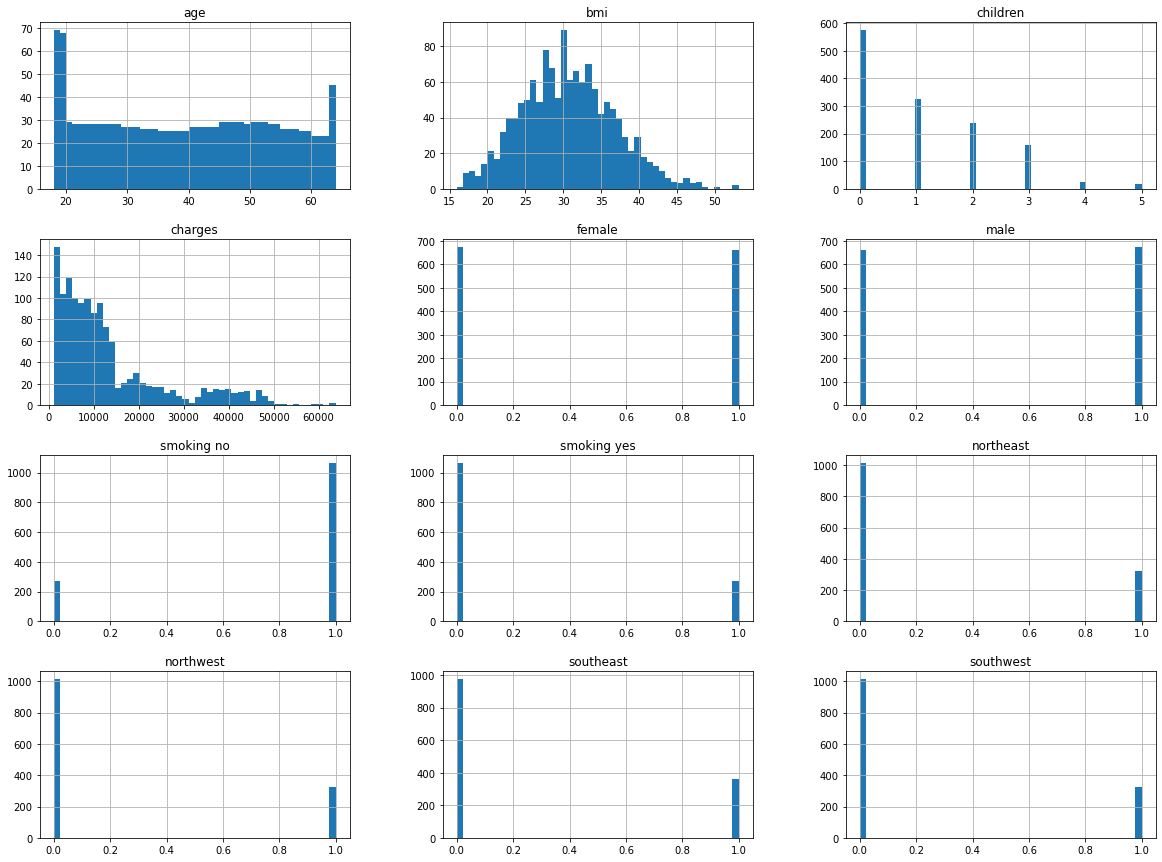

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
insurance.hist(bins=46,figsize=(20,15))
plt.show()

Aus den Histogrammen lassen sich erste Schlüsse über die Daten ziehen:
1. Das Alter wird für Personen unter 18 Jahren aufgerundet aud 18(?) Jahre, dies erklärt den Peak im ersten Histogramm.
2. Liegen Definitionslücken im Alter vor. Es scheint das manche Altersklassifiziereungen (alle 10 JAhre) nicht auftreten.
3. Der BMI ist relativ normalverteilt mit leichter Tendenz zu höheren Werten. (zu wertend?)
4. Die Anzahl der Kinder nimmt (exponentiell?) ab.
5. Es gibt einen größeren BAuch im niedrigen Kostenbereich

## 2.6 Sample a test set, put it aside, and never look at it (no data snooping!).

In [13]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(insurance, test_size=0.3,shuffle=False)  # test und training datensatz im selben gleichgewicht

## 2.7 Sample a training set and a validation set.

?? point above?

# 3 Explore the Data

see HoML page 56

## 3.1 Create a copy of the training set for exploration (sample it down to a manageable size if necessary).

In [ ]:
training_exploratrion = train_set.copy()
training_exploratrion

## 3.2 Create a Jupyter Notebook for your Data Exploration

?? wie?

## 3.3 Study each aatribute and its characteristics
    - name
    - type
    - % of missing values
    - noisiness
    - usefulness for task
    - type of distribution
    - ...

## 3.4 Identify the target attribute (supervised learning)

## 3.5 Visualize the data

## 3.6 Study correlation between attributes

## 3.7 Identify the promising transformations you want to apply

## 3.8 Document the results of your exploratory data analysis